In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import mpl_finance
from mpl_finance import candlestick_ohlc
import datetime as dt
import matplotlib as mdates

In [6]:
style.use('ggplot')

In [2]:
df = pd.read_csv('acerinox.csv', parse_dates = True, index_col = 0)

In [4]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2009-02-11,10.28,10.28,10.19,10.23,0
2009-02-12,9.95,10.25,9.95,10.18,0
2009-02-13,10.40,10.40,10.10,10.10,0
2009-02-16,9.95,10.19,9.95,10.10,0
2009-02-17,9.50,9.95,9.50,9.95,0


In [5]:
df = df[['Open','High','Low','Close','Volume']]
#df.head()

In [6]:
print(df)

              Open    High    Low  Close   Volume
Date                                             
2009-02-11  10.230  10.280  10.19  10.28        0
2009-02-12  10.180  10.250   9.95   9.95        0
2009-02-13  10.100  10.400  10.10  10.40        0
2009-02-16  10.100  10.190   9.95   9.95        0
2009-02-17   9.950   9.950   9.50   9.50        0
2009-02-18   9.560   9.770   9.30   9.30        0
2009-02-19   9.520   9.550   9.23   9.23        0
2009-02-20   9.200   9.230   8.77   8.77        0
2009-02-25   8.910   9.080   8.51   8.51        0
2009-02-26   8.640   9.370   8.58   9.37        0
2009-02-27   8.940   9.150   8.79   9.15        0
2009-03-06   8.330   8.590   8.21   8.59        0
2009-03-09   8.420   8.460   8.29   8.29        0
2009-03-10   8.200   8.950   8.20   8.95        0
2009-03-11   8.870   9.220   8.81   9.22        0
2009-03-12   8.900   9.140   8.72   9.14        0
2009-03-13   9.160   9.240   8.43   8.43        0
2009-03-16   8.660   8.690   8.53   8.53        0


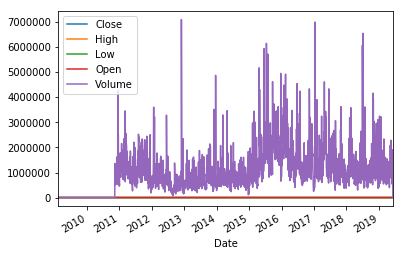

In [3]:
df.plot()

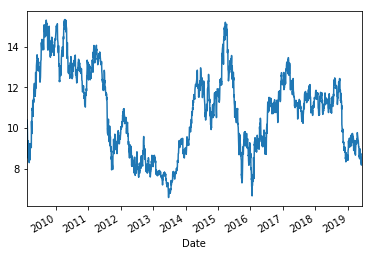

In [4]:
df['Close'].plot()

In [5]:
df['100MA'] = df['Close'].rolling(window=100).mean()

In [6]:
df.dropna(inplace = True)

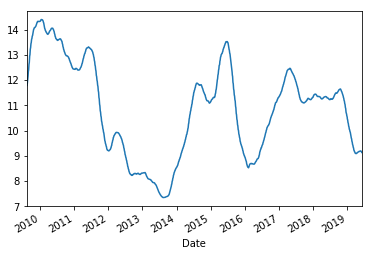

In [7]:
df['100MA'].plot()

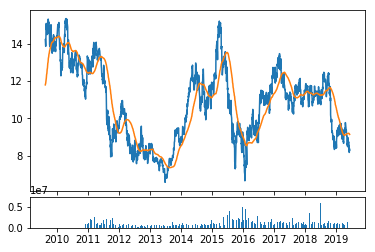

In [8]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 5, colspan = 1, sharex = ax1 )
ax1.plot(df.index, df['Close'])
ax1.plot(df.index, df['100MA'])
ax2.bar(df.index,  height = df['Volume'])
plt.show()

In [10]:
import matplotlib.dates as dates
from matplotlib.dates import date2num

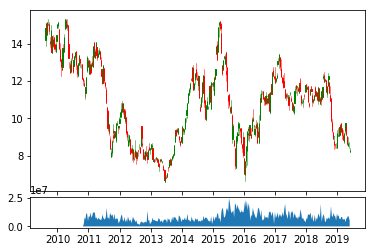

In [11]:
df_ohlc = df['Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

df_ohlc.reset_index(inplace = True)

df_ohlc['Date'] = df_ohlc['Date'].map(dates.date2num)

ax3 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax4 = plt.subplot2grid((6,1), (5,0), rowspan = 5, colspan = 1, sharex = ax3 )
ax3.xaxis_date()

candlestick_ohlc(ax3, df_ohlc.values, width = 2, colorup = 'g')
ax4.fill_between(df_volume.index.map(dates.date2num), df_volume.values, 0)
plt.rcParams["figure.figsize"] = (60,40)

In [14]:
print(df_ohlc)

         Date   open   high    low  close
0    733449.0  10.28  10.40   8.77   8.77
1    733459.0   8.51   9.37   8.51   9.15
2    733469.0   8.59   9.22   8.29   9.14
3    733479.0   8.43   9.23   8.43   9.23
4    733489.0   9.03   9.03   9.03   9.03
5    733499.0   9.61  10.97   9.61  10.97
6    733509.0  10.85  11.35  10.57  10.57
7    733519.0  11.24  11.81  11.24  11.74
8    733529.0  12.07  12.20  11.76  11.90
9    733539.0  11.81  12.74  11.56  11.95
10   733549.0  12.15  13.07  12.15  13.07
11   733559.0  13.32  13.61  13.00  13.61
12   733569.0  13.38  13.42  12.83  13.17
13   733579.0  13.25  13.25  12.81  12.94
14   733589.0  13.02  13.02  12.26  12.32
15   733599.0  12.51  13.36  12.51  13.36
16   733609.0  13.59  14.37  13.59  14.37
17   733619.0  13.88  14.35  13.88  14.35
18   733629.0  14.14  14.22  13.86  14.02
19   733639.0  14.32  15.09  14.32  14.92
20   733649.0  14.70  14.82  14.49  14.82
21   733659.0  14.93  15.32  14.82  15.22
22   733669.0  15.08  15.16  14.54